# Numerical solutions

### Parameter values and initial values for the state variables

In [1]:
#Importing the necessary packages
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# Parameter values
b = 2171  # Birth rate
p = 0.65  # Probability of infection upon contact
tau_s = 0.028 # Rate of quarantine by susceptible
tau_i = 0.074 # Rate of quarantine by infectious
gamma_q = 0.0714  # Rate of recovery from quarantine
gamma_i = 0.143  # Rate of recovery from infected
delta_q = 0.007 # Disease induced death by quarantine
delta_i = 0.027 # Disease induced death by infectious
rho = 0.00556  # Immunity loss rate
mu = 0.0000413  # Natural mortality rate


# Initial conditions for the state variables
S0 = 6028460  # Initial susceptible population
Q0 = 620  # Initial quarantined population
I0 = 150  # Initial infected population
R0 = 1951  # Initial recovered population



### Sensitivity analysis

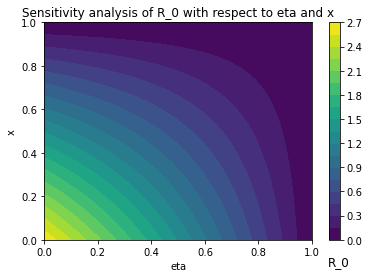

In [16]:
# Defining the range of values for eta and x
eta_range = np.linspace(0, 1, 100)
x_range = np.linspace(0, 1, 100)

# Defining tau
tau = mu + delta_i + gamma_i + tau_i

# Creating a 2D grid of eta and x values
eta_grid, x_grid = np.meshgrid(eta_range, x_range)

# Calculating the reproductive number for each combination of eta and x
R0_grid = (p * (1 - eta_grid) / tau) * (1 - x_grid)

# Creating a contour plot of R0 as a function of eta and x
plt.contourf(eta_grid, x_grid, R0_grid, levels=20, cmap='viridis')
plt.colorbar()
plt.xlabel('eta')
plt.ylabel('x')
plt.title('Sensitivity analysis of R_0 with respect to eta and x')
plt.text(1.1, -0.1, 'R_0', ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)
plt.show()


### Time series for the state variables

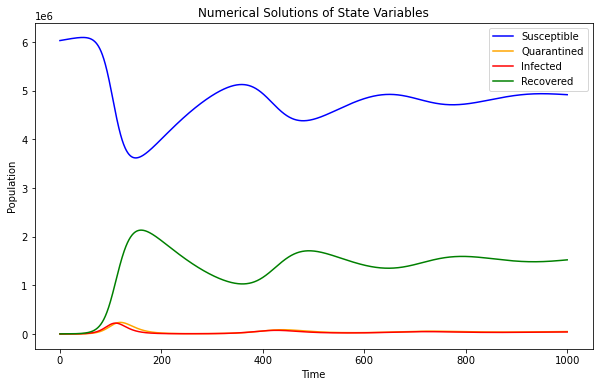

In [3]:
#Parameter values
eta = 0.5 # Self-protection efficacy
x = 0.0 # Vaccinated proportion

# Defining the model, with a fixed value of x
def model(variables, t):
    S, Q, I, R = variables
    N = S + Q + I + R  # Total population
    dSdt = b - (p * (1 - eta) + tau_s) * (I / N) * S * (1 - x) + rho * R - mu * S
    dQdt = tau_s * (I / N) * S * (1 - x) + tau_i * I - (gamma_q + mu + delta_q) * Q
    dIdt = p * (1 - eta) * (I / N) * S * (1 - x) - (tau_i + gamma_i + mu + delta_i) * I
    dRdt = gamma_q * Q + gamma_i * I - (mu + rho) * R
    return [dSdt, dQdt, dIdt, dRdt]

# Time points
t = np.linspace(0, 1000, 2000)

# Solving the differential equations
sol = odeint(model, [S0, Q0, I0, R0], t)

# Extracting the state variables
S = sol[:, 0]
Q = sol[:, 1]
I = sol[:, 2]
R = sol[:, 3]

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(t, S, label='Susceptible', color='blue')
plt.plot(t, Q, label='Quarantined', color='orange')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Numerical Solutions of State Variables')
plt.legend()
plt.show()

### Time series for infected and quarantined with varying values for eta and x

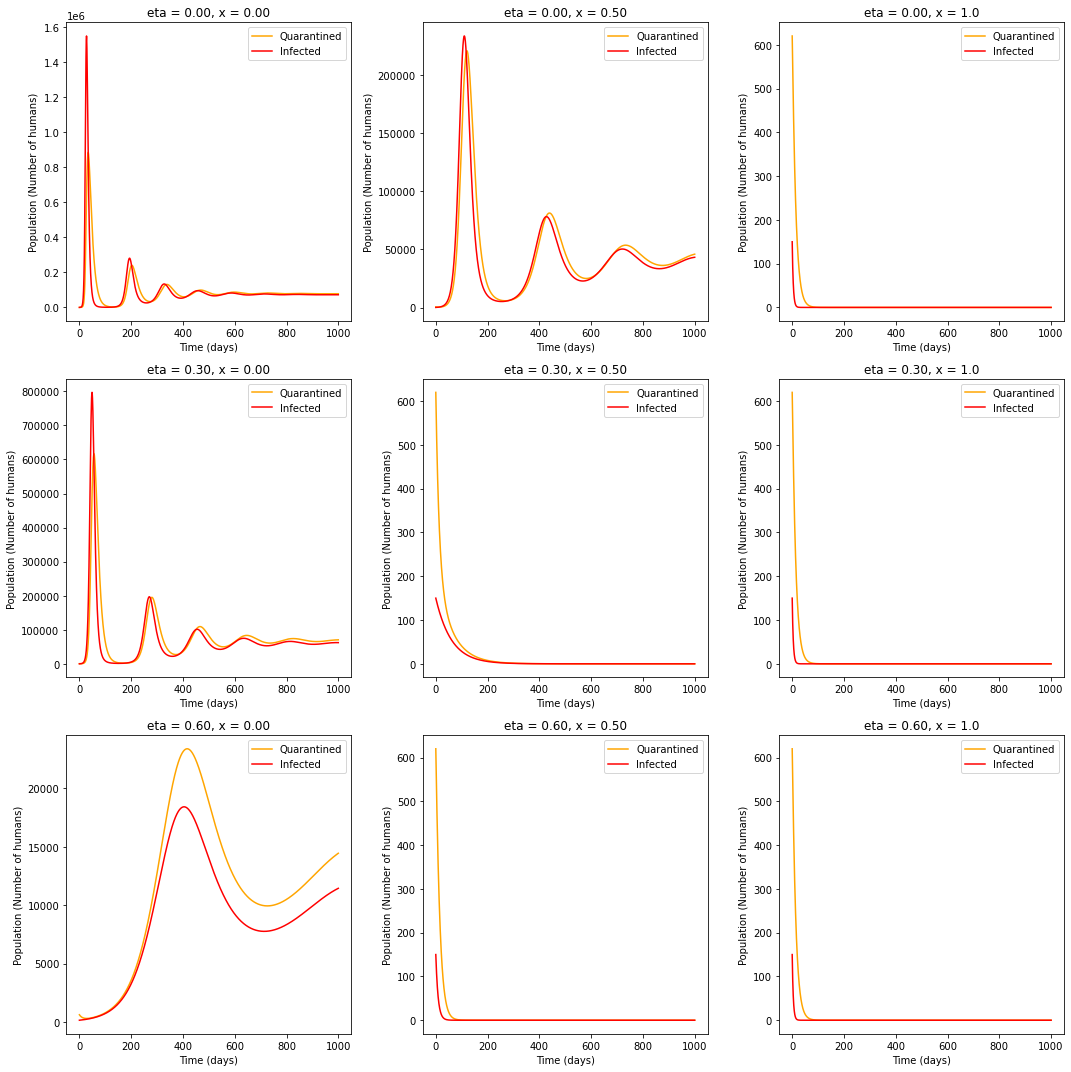

In [4]:
# Initial conditions for the state variables
S0 = 6028460  # Initial susceptible population
Q0 = 620  # Initial quarantined population
I0 = 150  # Initial infected population
R0 = 1951  # Initial recovered population

# Time points
t = np.linspace(0, 1000, 2000)

# Values of eta and x
eta_values = [0.0, 0.3, 0.6]  # Values for eta
x_values = [0.0, 0.5, 1]  # Values for x


# Plotting the results for each combination of eta and x
fig, axes = plt.subplots(len(eta_values), len(x_values), figsize=(15, 15))

for i, eta in enumerate(eta_values):
    for j, x in enumerate(x_values):
        # Solving the differential equations
        sol = odeint(model, [S0, Q0, I0, R0], t)

        # Extracting the state variables for  and I
        Q = sol[:, 1]
        I = sol[:, 2]

        # Plotting the results
        ax = axes[i, j]
        ax.plot(t, Q, label='Quarantined', color='orange')
        ax.plot(t, I, label='Infected', color='red')
        ax.set_xlabel('Time (days)')
        ax.set_ylabel('Population (Number of humans)')
        ax.set_title(f'eta = {numerical_approx(eta, digits=1)}, x = {numerical_approx(x, digits=1)}')
        ax.legend()

plt.tight_layout()
plt.show()


### Dynamics of x

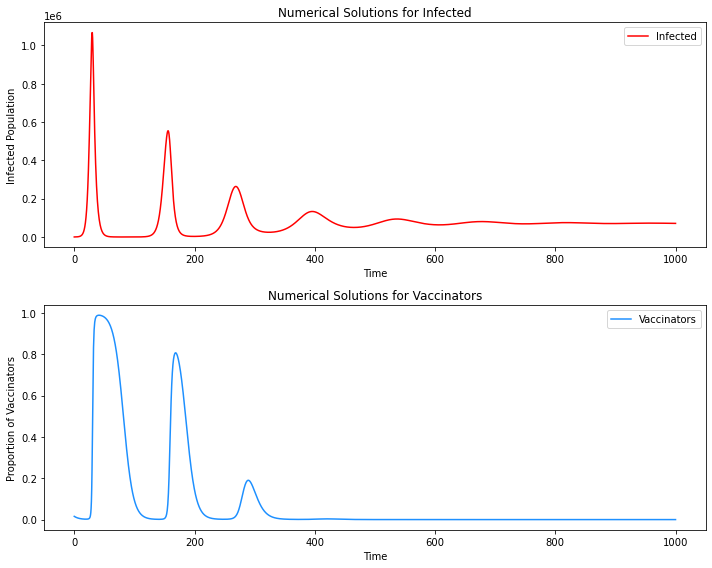

In [8]:
# Initial conditions for the state variables
S0 = 6028460  # Initial susceptible population
Q0 = 620  # Initial quarantined population
I0 = 150  # Initial infected population
R0 = 1951  # Initial recovered population
x0 = 0.01563 # Initial proportion of vaccinators


#Parameter values
p = 0.65  # Probability of infection upon contact
eta = 0.1 # Self-protection efficacy
k = 12.5  # Scaled combination of the imitation rate and productivity parameter
xi = 0.01 # Perceived probability of significant productivity loss

#Defining the model
def model(variables, t):
    S, Q, I, R, x = variables
    N = S + Q + I + R  # Total population
    dSdt = b - (p * (1 - eta) + tau_s) * (I / N) * S * (1 - x) + rho * R - mu * S
    dQdt = tau_s * (I / N) * S * (1 - x) + tau_i * I - (gamma_q + mu + delta_q) * Q
    dIdt = p * (1 - eta) * (I / N) * S * (1 - x) - (tau_i + gamma_i + mu + delta_i) * I
    dRdt = gamma_q * Q + gamma_i * I - (mu + rho) * R
    dxdt = k * x * (1 - x) * (-xi + p * (1 - eta) * (I / N))
    return [dSdt, dQdt, dIdt, dRdt, dxdt]

# Time points
t = np.linspace(0, 1000, 2000)

# Solving the differential equations
sol = odeint(model, [S0, Q0, I0, R0, x0], t)

# Extracting the state variables
S = sol[:, 0]
Q = sol[:, 1]
I = sol[:, 2]
R = sol[:, 3]
x = sol[:, 4]

# Plot the results
plt.figure(figsize=(10, 8))

# Define subplot titles and corresponding data
subplots = {
    'Infected': I,
    'Vaccinators': x
}

# Create subplots using a for loop
i = 1
for title, data in subplots.items():
    plt.subplot(2, 1, i)
    plt.plot(t, data, label=title, color='red' if title == 'Infected' else 'dodgerblue')
    plt.xlabel('Time')
    if title == 'Infected':
        plt.ylabel('Infected Population')
    elif title == 'Vaccinators':
        plt.ylabel('Proportion of Vaccinators')
    plt.title('Numerical Solutions for {}'.format(title))
    plt.legend()
    i += 1

plt.tight_layout()
plt.show()